<a href="https://colab.research.google.com/github/AlphaKermit-999/AI-Topics-learnings/blob/main/Advanced_AI/RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
df = pd.read_csv("/content/NSE-TATAGLOBAL.csv", parse_dates=["Date"])

/tmp/ipython-input-3397117991.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv("/content/NSE-TATAGLOBAL.csv", parse_dates=["Date"])


In [2]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [3]:
df = df[["Date", "Close"]]

In [4]:
df.dtypes

,0
Date,datetime64[ns]
Close,float64


In [5]:
# import pytz
# dir(pytz)

In [6]:
df.head()

,Date,Close
0,2018-09-28,233.75
1,2018-09-27,233.25
2,2018-09-26,234.25
3,2018-09-25,236.10
4,2018-09-24,233.30


In [7]:
df = df.sort_values(by="Date")
df.isnull().sum()

,0
Date,0
Close,0


In [8]:
df.head(1)

,Date,Close
2034,2010-07-21,121.55


In [9]:
df.tail(1)

,Date,Close
0,2018-09-28,233.75


In [10]:
d1 = pd.date_range(start="21-07-2010", end="28-09-2018", freq="B")

In [11]:
df.shape

(2035, 2)

In [12]:
d1.shape

(2138,)

In [13]:
2138-2035

103

In [14]:
data = pd.DataFrame(d1)
data.columns=["Date"]
data.head()

,Date
0,2010-07-21
1,2010-07-22
2,2010-07-23
3,2010-07-26
4,2010-07-27


In [15]:
df = pd.merge(df, data, how="right", on="Date")

In [16]:
df.shape

(2138, 2)

In [17]:
df.isnull().sum()

,0
Date,0
Close,112


In [18]:
df.fillna(method="ffill", inplace=True) #pad=ffill. bfill=backfill

/tmp/ipython-input-3987807005.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True) #pad=ffill. bfill=backfill


In [19]:
df.head()

,Date,Close
0,2010-07-21,121.55
1,2010-07-22,120.90
2,2010-07-23,120.65
3,2010-07-26,117.60
4,2010-07-27,118.65


<function matplotlib.pyplot.show(close=None, block=None)>

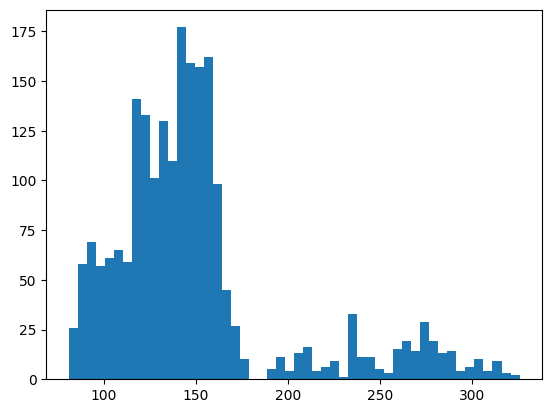

In [20]:
import matplotlib.pyplot as plt
plt.hist(df["Close"], bins=50)
plt.show

In [21]:
df.describe()

,Date,Close
count,2138,2138.000000
mean,2014-08-24 21:35:11.506080512,149.539476
min,2010-07-21 00:00:00,80.950000
25%,2012-08-07 06:00:00,120.100000
50%,2014-08-25 12:00:00,141.400000
75%,2016-09-11 06:00:00,157.037500
max,2018-09-28 00:00:00,325.750000
std,NaN,48.621193


In [22]:
df.shape

(2138, 2)

<Axes: >

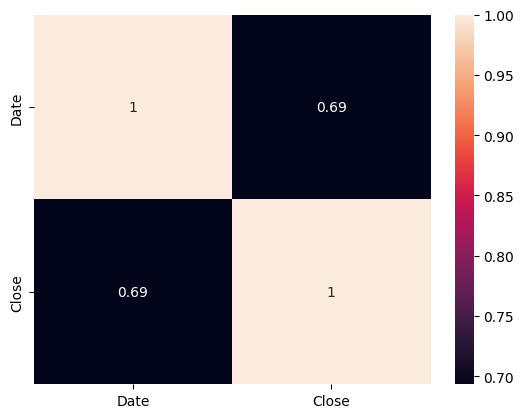

In [23]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True)

In [24]:
# rolling window menthodolgy - not to use train test split in this case

xtrain = []
ytrain = []
for i in range(60, df.shape[0]):
  xtrain.append(df.iloc[i-60:i, 1])
  ytrain.append(df.iloc[i, 1])

In [25]:
import numpy as np
xtrain, ytrain = np.array(xtrain), np.array(ytrain)

In [26]:
xtrain.shape

(2078, 60)

In [27]:
ytrain.shape

(2078,)

In [28]:
xtrain1 = np.reshape(xtrain, (xtrain.shape[0], xtrain.shape[1], 1))

In [29]:
xtrain1.shape[1:]

(60, 1)

In [30]:
xtrain1.shape

(2078, 60, 1)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Dropout, GRU

In [32]:
model = Sequential()
model.add(SimpleRNN(units=60, return_sequences=True, input_shape=xtrain1.shape[1:]))
model.add(SimpleRNN(units=60, return_sequences=True))
model.add(SimpleRNN(units=60, return_sequences=True))
model.add(SimpleRNN(units=60))
model.add(Dense(units=1))


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)          │ (None, 60, 60)         │         3,720 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ (None, 60, 60)         │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 60, 60)         │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 60)             │         7,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            61 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,561 (99.85 KB)

 Trainable params: 25,561 (99.85 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer="adam", loss="mse")
h6 = model.fit(xtrain, ytrain, epochs=100, batch_size=30)

Epoch 1/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 11s 59ms/step - loss: 23333.8691
Epoch 2/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 79ms/step - loss: 20953.1113
Epoch 3/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 19711.6680
Epoch 4/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 53ms/step - loss: 18411.1387
Epoch 5/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 78ms/step - loss: 17485.3340
Epoch 6/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - loss: 16303.7686
Epoch 7/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 56ms/step - loss: 15880.5312
Epoch 8/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 82ms/step - loss: 14761.2627
Epoch 9/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 13900.1572
Epoch 10/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 6s 81ms/step - loss: 12899.5850
Epoch 11/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - loss: 12352.8486
Epoch 12/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - loss: 11275.0146
Epoch 13/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 11317.9092
Epoch 14/100
70/70 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - loss: 10064.2861


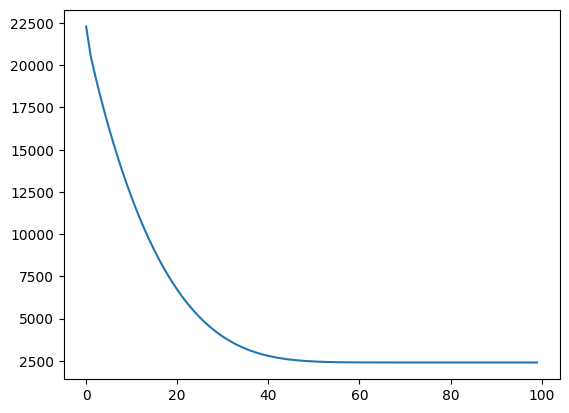

In [35]:
plt.plot(h6.history["loss"])

In [36]:
ypred = model.predict(xtrain1)

65/65 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step


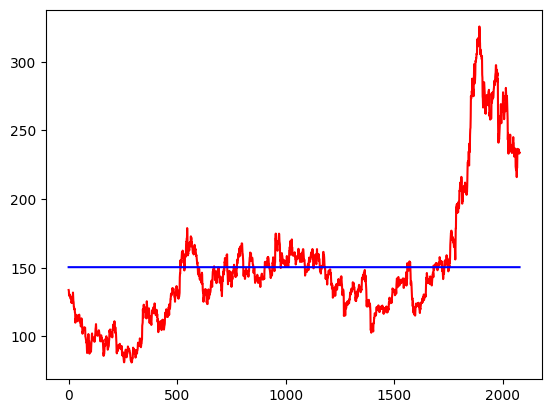

In [37]:
plt.plot(ytrain, color="red")
plt.plot(ypred, color="blue")
plt.show()

In [38]:
df.tail()

,Date,Close
2133,2018-09-24,233.30
2134,2018-09-25,236.10
2135,2018-09-26,234.25
2136,2018-09-27,233.25
2137,2018-09-28,233.75


In [39]:
test = pd.read_csv("tatatest.csv")

In [40]:
test.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Last,0
Close,0
Total Trade Quantity,0
Turnover (Lacs),0


In [41]:
test.sort_values(by="Date", inplace=True)

In [42]:
test = test[["Date", "Close"]]

In [43]:
test.head()

,Date,Close
15,2018-10-01,230.90
14,2018-10-03,227.60
13,2018-10-04,218.20
12,2018-10-05,209.20
11,2018-10-08,215.15


In [44]:
t1 = pd.concat([df["Close"], test["Close"]], axis=0)

In [45]:
t1.head()

,Close
0,121.55
1,120.90
2,120.65
3,117.60
4,118.65


In [46]:
type(t1)

pandas.core.series.Series

In [47]:
t1.shape

(2154,)

In [48]:
t1.shape[0]

2154

In [49]:
df = df["Close"]

In [50]:
inputs = t1[len(t1)-len(test)-60:].values
print(inputs.shape)
inputs= inputs.reshape(-1,1)
print(inputs.shape)
xtest = []
for i in range(60, inputs.shape[0]):
  xtest.append(inputs[i-60:i, 0])
xtest = np.array(xtest)

(76,)
(76, 1)


In [51]:
t1.shape

(2154,)

In [52]:
test.shape

(16, 2)

In [53]:
xtest1 = np.reshape(xtest, (xtest.shape[0], xtest.shape[1], 1))

In [54]:
xtest1.shape

(16, 60, 1)

In [55]:
xtrain1.shape

(2078, 60, 1)

In [56]:
pred = model.predict(xtest1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step


In [57]:
y1 = test["Close"].values
y1

array([230.9 , 227.6 , 218.2 , 209.2 , 215.15, 216.5 , 228.4 , 224.6 ,
       229.1 , 234.9 , 235.45, 231.1 , 227.2 , 223.25, 218.3 , 219.8 ])

In [58]:
y2=np.round(pred.flatten(),1)
y2

array([150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4,
       150.4, 150.4, 150.4, 150.4, 150.4, 150.4, 150.4], dtype=float32)

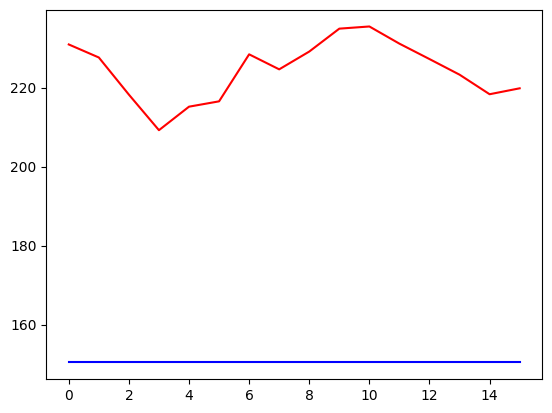

In [59]:
plt.plot(y1, color="red")
plt.plot(y2, color="blue")
plt.show()

In [60]:
t1.shape

(2154,)

In [61]:
test.shape


(16, 2)